In [1]:
import os
import numpy as np
import cv2
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import json

**PATHS**

In [2]:
image_path     = '../../../dataset/images'
training_path  = os.path.join(image_path, 'training')
original_path  = os.path.join(training_path, 'original')
processed_path  = os.path.join(training_path, 'processed')

**LISTAS DE IMAGENES**

In [3]:
original  = [os.path.join(original_path, image) for image in os.listdir(original_path)]
procesed  = [os.path.join(processed_path, image) for image in os.listdir(processed_path)]

**RANGOS DE COLOR**

In [4]:
lower_green = np.array([28, 40, 40])
upper_green = np.array([100, 255, 255])

lower_red_1 = np.array([0, 120, 100])
upper_red_1 = np.array([5, 255, 255])

lower_red_2 = np.array([170, 120, 100])
upper_red_2 = np.array([179, 255, 255])

lower_yellow = np.array([18, 50, 80])
upper_yellow = np.array([33, 255, 255])

lower_orange = np.array([5, 120, 90])
upper_orange = np.array([20, 255, 255])

**MASKS KMEANS**
- Se invierte demasiado tiempo en la ejecución del filtro de eliminación del ruido.

In [ ]:
for k, file in enumerate(original):
    # BGR image
    image = cv2.imread(file)

    # Gray scale image
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Standard deviation estimated
    #sigma_est  = estimate_sigma(gray_image)

    # Non local means noise filter
    #image = cv2.fastNlMeansDenoising(image, None, h = 2*sigma_est, templateWindowSize = 5, searchWindowSize = 50)
    height, width, _ = image.shape
    

    # Recalculate Gray Scale from denoised image
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #_, mask_gray = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Gray Scale mask
    #mask_gray = np.uint8(mask_gray)
 
    # Pixel data vector
    data_vector = np.zeros((height * width, 8))  # 3 for RGB, 3 for HSV, 3 for LAB, 1 for gray scale

    # Rellenar el vector con los valores de cada píxel
    '''for i in range(height):
        for j in range(width):
            pixel = image[i, j]

            # RGB
            data_vector[i * width + j, :3] = pixel

            # HSV
            hsv_pixel = cv2.cvtColor(np.array([[pixel]], dtype=np.uint8), cv2.COLOR_RGB2HSV)[0, 0]
            data_vector[i * width + j, 3:5] = hsv_pixel[1:]

            # LAB
            lab_pixel = cv2.cvtColor(np.array([[pixel]], dtype=np.uint8), cv2.COLOR_RGB2LAB)[0, 0]
            data_vector[i * width + j, 5:7] = lab_pixel[1:]

            # Escala de grises
            data_vector[i * width + j, 7] = cv2.cvtColor(np.array([[pixel]], dtype=np.uint8), cv2.COLOR_RGB2GRAY)[0, 0]'''

    # Obtener matrices de color
    rgb_matrix = image.reshape((-1, 3))
    hsv_matrix = cv2.cvtColor(image, cv2.COLOR_BGR2HSV).reshape((-1, 3))
    lab_matrix = cv2.cvtColor(image, cv2.COLOR_BGR2LAB).reshape((-1, 3))
    #gray_matrix = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).reshape((-1, 1))

    # Asignar a la matriz de datos
    data_vector[:, :3] = rgb_matrix
    data_vector[:, 3:5] = hsv_matrix[:,:2]
    data_vector[:, 5:] = lab_matrix

    kmeans = KMeans(n_clusters = 2)  # 2 Clusters. Background and fruit
    kmeans.fit(data_vector)

    # Get clusters labels
    labels = kmeans.labels_

    # kmeans_mask
    kmeans_mask = labels.reshape(height, width)
    kmeans_mask = kmeans_mask.astype(np.uint8) * 255

    # BGR to HSV form denoised image
    '''hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_image)
    l, a, b = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))'''

    # Masks obtained with otsu from hech channel from denoised image
    # _, mask_h = cv2.threshold(h, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #_, mask_s = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #_, mask_v = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #_, mask_l = cv2.threshold(l, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #_, mask_b = cv2.threshold(b, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #_, mask_a = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #_, mask_r = cv2.threshold(image[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #_, mask_g = cv2.threshold(image[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #_, mask_b = cv2.threshold(image[:,:,2], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


    # Color masks
    '''mask_red    = cv2.inRange(hsv_image, lower_red_1, upper_red_1) | cv2.inRange(hsv_image, lower_red_2, upper_red_2)
    mask_orange = cv2.inRange(hsv_image, lower_orange, upper_orange)
    mask_green  = cv2.inRange(hsv_image, lower_green, upper_green)
    mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)'''

    # Whole color mask
    #combined_mask = mask_red | mask_orange | mask_green | mask_yellow

    #contours
    #color
    '''sobel_x = cv2.Sobel(combined_mask, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(combined_mask, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, colorWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)'''

    # kmeans
    sobel_x = cv2.Sobel(kmeans_mask, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(kmeans_mask, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, kmeansWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # gray
    '''sobel_x = cv2.Sobel(mask_gray, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_gray, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, grayWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # h
    #sobel_x = cv2.Sobel(mask_h, cv2.CV_64F, 1, 0, ksize=9)
    #sobel_y = cv2.Sobel(mask_h, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    #magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    #magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    #_, hWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # s
    sobel_x = cv2.Sobel(mask_s, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_s, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, sWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)'''

    # v
    #sobel_x = cv2.Sobel(mask_v, cv2.CV_64F, 1, 0, ksize=9)
    #sobel_y = cv2.Sobel(mask_v, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    #magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    #magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    #magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    #_, vWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # l
    #sobel_x = cv2.Sobel(mask_l, cv2.CV_64F, 1, 0, ksize=9)
    #sobel_y = cv2.Sobel(mask_l, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    #magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    #magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    #magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    '''_, lWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # b
    sobel_x = cv2.Sobel(mask_b, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_b, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, bWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # a
    sobel_x = cv2.Sobel(mask_a, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_a, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, aWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)'''

    #R
    sobel_x = cv2.Sobel(mask_r, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_r, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, rWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    '''#G
    sobel_x = cv2.Sobel(mask_g, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_g, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, gWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #B
    sobel_x = cv2.Sobel(mask_b, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_b, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, bWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)'''


    # Encontrar contornos
    kmeans_cnt, _ = cv2.findContours(kmeansWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #color_cnt, _ = cv2.findContours(colorWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #gray_cnt, _ = cv2.findContours(grayWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #h_cnt, _ = cv2.findContours(hWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #s_cnt, _ = cv2.findContours(sWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #v_cnt, _ = cv2.findContours(vWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #l_cnt, _ = cv2.findContours(lWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #b_cnt, _ = cv2.findContours(bWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #a_cnt, _ = cv2.findContours(aWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #r_cnt, _ = cv2.findContours(rWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #g_cnt, _ = cv2.findContours(gWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #b_cnt, _ = cv2.findContours(bWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar contornos
    # templates
    #tcolor = np.zeros((height, width), dtype=np.uint8)
    tkmeans = np.zeros((height, width), dtype=np.uint8)
    #tgray = np.zeros((height, width), dtype=np.uint8)
    #th = np.zeros((height, width), dtype=np.uint8)
    #ts = np.zeros((height, width), dtype=np.uint8)
    #tv = np.zeros((height, width), dtype=np.uint8)
    #tl = np.zeros((height, width), dtype=np.uint8)
    #tb = np.zeros((height, width), dtype=np.uint8)
    #ta = np.zeros((height, width), dtype=np.uint8)
    #tr = np.zeros((height, width), dtype=np.uint8)
    #tg = np.zeros((height, width), dtype=np.uint8)
    #tb = np.zeros((height, width), dtype=np.uint8)

    # dibujar
    #cv2.drawContours(tcolor, color_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(tkmeans, kmeans_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(tgray, gray_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(th, h_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(ts, s_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(tv, v_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(tl, l_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(tb, b_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(ta, a_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(tr, r_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(tg, g_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(tb, b_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno

    # superposición
    #whole = np.zeros((height, width), dtype=np.uint8)
    #cv2.drawContours(whole, color_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, kmeans_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, gray_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, h_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, s_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, v_cnt, -1,255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, l_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, b_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, a_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno

    # plotting
    plt.figure(figsize =(5,5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(file))
    '''plt.subplot(1, 7, 2)
    plt.imshow(combined_mask, cmap='gray')
    plt.title('color')'''
    plt.subplot(1, 3, 2)
    plt.imshow(kmeans_mask, cmap='gray')
    plt.title('kmeans')
    '''plt.subplot(1, 7, 4)
    plt.imshow(mask_gray, cmap='gray')
    plt.title('gray_umbral')'''
    #plt.subplot(1, 10, 5)
    #plt.imshow(mask_h, cmap='gray')
    #plt.title('h')
    '''plt.subplot(1, 7, 5)
    plt.imshow(mask_s, cmap='gray')
    plt.title('s')'''
    #plt.subplot(1, 10, 7)
    #plt.imshow(mask_v, cmap='gray')
    #plt.title('v')
    #plt.subplot(1, 10, 8)
    #plt.imshow(mask_l, cmap='gray')
    #plt.title('l')
    '''plt.subplot(1, 7, 6)
    plt.imshow(mask_b, cmap='gray')
    plt.title('b')
    plt.subplot(1, 7, 7)
    plt.imshow(mask_a, cmap='gray')
    plt.title('a')'''
    #plt.show()

    #plt.figure(figsize =(4,4))
    '''plt.subplot(1, 7, 1)
    plt.imshow(tcolor, cmap='gray')
    plt.title('color')'''
    '''plt.subplot(1, 5, 3)
    plt.imshow(mask_r, cmap='gray')
    plt.title('r')'''
    '''plt.subplot(1, 9, 4)
    plt.imshow(mask_g, cmap='gray')
    plt.title('g')
    plt.subplot(1, 9, 5)
    plt.imshow(mask_b, cmap='gray')
    plt.title('b')'''
    plt.subplot(1, 3, 3)
    plt.imshow(tkmeans, cmap='gray')
    plt.title('kmeans')
    '''plt.subplot(1, 5, 5)
    plt.imshow(tr, cmap='gray')
    plt.title('r')'''
    '''
    plt.subplot(1, 9, 8)
    plt.imshow(tg, cmap='gray')
    plt.title('g')
    plt.subplot(1, 9, 9)
    plt.imshow(tb, cmap='gray')
    plt.title('b')'''
    
    '''
    plt.subplot(1, 7, 3)
    plt.imshow(tgray, cmap='gray')
    plt.title('gray_umbral')
    #plt.subplot(1, 10, 4)
    #plt.imshow(th, cmap='gray')
    #plt.title('h')
    plt.subplot(1, 7, 4)
    plt.imshow(ts, cmap='gray')
    plt.title('s')
    #plt.subplot(1, 10, 6)
    #plt.imshow(tv, cmap='gray')
    #plt.title('v')
    #plt.subplot(1, 10, 7)
    #plt.imshow(tl, cmap='gray')
    #plt.title('l')
    plt.subplot(1, 7, 5)
    plt.imshow(tb, cmap='gray')
    plt.title('b')
    plt.subplot(1, 7, 6)
    plt.imshow(ta, cmap='gray')
    plt.title('a')
    plt.subplot(1, 7, 7)
    plt.imshow(whole, cmap='gray')
    plt.title('whole')'''
    plt.show()

**COMPARACIÓN DE LAS MÁSCARAS USADAS EN TEST1**
- Se puede observar que la máscara que se obtiene con la escala de grises y la máscara que se obtiene con L de LAB son esencialmente las mismas. Con lo cual no tiene sentido conservar las dos
- La eliminación del filtro de suavizado de ruido de la imágen no produce empeoramientos apreciables sobre la separación con lo cual conviene mas que conservarlo dado que insume mucho tiempo
- La máscara de v puede ayudar pero es muy propensa a las sombras de la imagen. En general se parece a la másca de l
- La máscara de S y la máscara de B son muy parecidas, en algunos casos capaz que la máscara de S es mejor. Y lo mejor de todo, es que las dos son bastante insensibles a las sombras.
- La máscara a parece ser bastante inerte y no ayudar demasiado excepto cuando se trata de las peras. En esos casos parece ser la mejor de las máscaras. En cambio en otros casos cuando es buena, la máscara B también lo es o es muy parecida a la máscara de l. En realidad pareciera que la máscara a funciona bien con las peras, las naranjas y las manzanas, siendo mejor con las manzanas y naranjas que con las peras y horrible con las bananas
- La escala de Hue, en la mayoria de los casos no funciona


Teniendo en cuenta esto vamos a probar a hacer lo siguiente:
- Quedarnos con la escala de grises y sacar la escala l o bien, quedarnos con la escala l y sacar la escala de gries
- Vamos a sacar la escala de hue
- Vamos a quedarnos con la escala de color, la escala de grises, el kmeans, el s, el b y el a. El s y b, aunque sean muy parecidos los conservamos porque son ligeramente distintos y pueden contribuir a un mejor resultado las variaciones entre los dos.
- El kmeans lo vamos a utilizar con las propiedades que conservamos solamente


- He probado quedandome solamente con las componentes que he indicado, pero aún así, la máscara de kmeans es propensa a las sombras. Vamos a probar utilizando la máscara de kmeans con las componentes indicadas pero sin la componente de l. Lo probamos en la celda que tiene solamente la aplicación de la máscara de kmeans
-  Me he dado cuenta de que sigue teniendo sensibilidada a las sombras aún cuando elimino el canal L (aunque funciona bastante bien de todas maneras). Vamos a probar eliminando también el canal s que es similar al b y es mas propenso a las sombras que el canal b. No, sin s anda bastante mal
- Probamos dejando el canal s pero sacando el canal a. Sigue siendo propenso a las sombras. Me parece que el tema de las sombras tendrá que ver con el hecho de que también estoy utilizando los valores RGB para el Kmeasn. Y esas máscaras en sí, han de ser propensas a las sombras.
- En efecto, los canalas de B Y G son canales muy propensos a las sombras en las imágenes. 
- En cambio, el canal R en sí mismo, con OTSU, es la mejor máscara que en la gran mayoría de los casos separa bien a la fruta del fondo blanco y además es sumamente insensible a las sombras. Ahora, esta máscara no funcionará bien en otro tipo de fondos. En concreto, lo probe cuando una narnja se encontraba en un fondo negro y la máscara n anda bien.
- Vamos a probar conservando solamente el canal R para la mascara Kmeans
- Me parece que dejamos el Kmeans con las máscaras de R, S, B y A. Con esos valores anda bastante bien. Sigue teniendo una leve sensibilidad a las sombras pero dentro de todo bien.
- Alguna cosa que podría probar de última es preprocesar todas las imágenes aplicando el filtro de atenuación de sombras de rolling ball para tratar de eliminación de las sombras siempre cuando el fondo sea blanco. No funciona bien
- Aparentemente las máscaras de b y s fucionan simpre bien cuando hay fondo blanco. Pienso que lo que se puede hacer es una supoerposición de las dos máscaras (una unión de las dos)

**OBTENCIÒN Y PRUEBA DE LAS MÀSCARAS**

Asumimos suficiente la utilización de la máscra de kmeans aunque no siempre funciona perfectamente.

In [5]:
names = ['t3.','t8.','t16.','t30.', 't42.', 't54.', '58.', 't70.','t81.', 't87.', 't88.', 't90.','t96.', 't131,', 't141.', '143', '144']
complicated = []
for file in original:
    if any(name in file for name in names):
        complicated.append(file)
print(complicated)

['../../../dataset/images/training/original/fruit8.jpeg', '../../../dataset/images/training/original/fruit81.jpg', '../../../dataset/images/training/original/fruit141.jpg', '../../../dataset/images/training/original/fruit87.jpeg', '../../../dataset/images/training/original/fruit90.jpeg', '../../../dataset/images/training/original/fruit42.jpg', '../../../dataset/images/training/original/fruit144.jpg', '../../../dataset/images/training/original/fruit70.jpg', '../../../dataset/images/training/original/fruit88.jpeg', '../../../dataset/images/training/original/fruit54.jpg', '../../../dataset/images/training/original/fruit16.jpeg', '../../../dataset/images/training/original/fruit143.jpg', '../../../dataset/images/training/original/fruit58.jpeg', '../../../dataset/images/training/original/fruit96.jpg', '../../../dataset/images/training/original/fruit3.jpeg', '../../../dataset/images/training/original/fruit30.jpg']


In [ ]:
for i, file in enumerate(complicated):
    image = cv2.imread(file)

    height, width, _ = image.shape
 
    # Crear un vector para almacenar los datos de cada píxel
    data_vector = np.zeros((height * width, 5))  # 3 para RGB, 3 para HSV, 3 para LAB, 1 para escala de grises

    hsv_matrix = cv2.cvtColor(image, cv2.COLOR_BGR2HSV).reshape((-1, 3))
    lab_matrix = cv2.cvtColor(image, cv2.COLOR_BGR2LAB).reshape((-1, 3))

    # Convertir la imagen de BGR a HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v   = cv2.split(hsv_image)
    l, a, b   = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    _, mask_h = cv2.threshold(h, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, mask_s = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, mask_v = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, mask_l = cv2.threshold(l, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, mask_b = cv2.threshold(b, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, mask_a = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    mask_sb   = mask_s | mask_b

    mask_red    = cv2.inRange(hsv_image, lower_red_1, upper_red_1) | cv2.inRange(hsv_image, lower_red_2, upper_red_2)
    mask_orange = cv2.inRange(hsv_image, lower_orange, upper_orange)
    mask_green  = cv2.inRange(hsv_image, lower_green, upper_green)
    mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

    # Unir las máscaras
    combined_mask   = mask_red | mask_orange | mask_green | mask_yellow


    # Asignar a la matriz de datos
    data_vector[:, :2] = hsv_matrix[:,:2]
    data_vector[:, 2:] = lab_matrix
    
    kmeans = KMeans(n_clusters = 2)
    kmeans.fit(data_vector)

    # Obtener las etiquetas de los clusters
    labels = kmeans.labels_

    # Crear una máscara basada en las etiquetas
    mask_kmeans = labels.reshape(height, width)
    mask_kmeans = mask_kmeans.astype(np.uint8) * 255

    #contornos
    #color
    sobel_x = cv2.Sobel(combined_mask, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(combined_mask, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, colorWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #kmeans
    sobel_x = cv2.Sobel(mask_kmeans, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_kmeans, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, kmeansWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #h
    sobel_x = cv2.Sobel(mask_h, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_h, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, hWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #s
    sobel_x = cv2.Sobel(mask_s, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_s, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, sWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #v
    sobel_x = cv2.Sobel(mask_v, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_v, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, vWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #l
    sobel_x = cv2.Sobel(mask_l, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_l, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, lWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #b
    sobel_x = cv2.Sobel(mask_b, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_b, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, bWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #a
    sobel_x = cv2.Sobel(mask_a, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_a, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, aWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #sb
    sobel_x = cv2.Sobel(mask_sb, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_sb, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, sbWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #Encontrar contornos
    kmeans_cnt, _ = cv2.findContours(kmeansWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    color_cnt, _  = cv2.findContours(colorWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    h_cnt, _      = cv2.findContours(hWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    s_cnt, _      = cv2.findContours(sWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    v_cnt, _      = cv2.findContours(vWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    l_cnt, _      = cv2.findContours(lWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    b_cnt, _      = cv2.findContours(bWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    a_cnt, _      = cv2.findContours(aWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sb_cnt, _     = cv2.findContours(sbWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #Dibujar contornos
    #templates
    tcolor  = np.zeros((height, width), dtype=np.uint8)
    tkmeans = np.zeros((height, width), dtype=np.uint8)
    tgray   = np.zeros((height, width), dtype=np.uint8)
    th      = np.zeros((height, width), dtype=np.uint8)
    ts      = np.zeros((height, width), dtype=np.uint8)
    tv      = np.zeros((height, width), dtype=np.uint8)
    tl      = np.zeros((height, width), dtype=np.uint8)
    tb      = np.zeros((height, width), dtype=np.uint8)
    ta      = np.zeros((height, width), dtype=np.uint8)
    tsb     = np.zeros((height, width), dtype=np.uint8)

    #dibujar
    cv2.drawContours(tcolor, color_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(tkmeans, kmeans_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(th, h_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(ts, s_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(tv, v_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(tl, l_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(tb, b_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(ta, a_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(tsb, sb_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno

    ''' masks_cntrs     = [kmeans_cnt, color_cnt, h_cnt, s_cnt, v_cnt, l_cnt, b_cnt, a_cnt, sb_cnt]
    convex          = [cv2.isContourConvex(cntrs[0]) for cntrs in masks_cntrs]
    masks           = [mask_kmeans, combined_mask, mask_h, mask_s, mask_v, mask_l, mask_b, mask_a, mask_sb]
    masks_templates = [tkmeans, tcolor, th, ts, tv, tl, tb, ta, tsb]
    masks_names     = ['k', 'color','h', 's', 'v', 'l', 'b', 'a', 'sb']
            
    len_cntrs       = [len(cntrs) for cntrs in masks_cntrs]
    one_cntr        = [number == 1 for number in len_cntrs]
    arc_lengths     = [cv2.arcLength(cntrs[0], closed=True) if is_one else None for is_one, cntrs in zip(one_cntr, masks_cntrs)]'''

    '''min_length = None
    indice2    = None
    for i, length in enumerate(arc_lengths):
        if length is not None:
            if (min_length is None) or (length < min_length):
                min_length = length
                indice2 = i
      
    indice          = len_cntrs.index(min(len_cntrs))
    if indice2 is None:
        indice2=indice'''

    #plotting
    '''plt.figure(figsize = (10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(masks[indice2], cmap = 'gray')
    plt.title(masks_names[indice2])
    plt.subplot(1, 3, 2)
    plt.imshow(masks_templates[indice2], cmap = 'gray')
    plt.title(masks_names[indice2])
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(file))
    plt.show()'''



    plt.figure(figsize =(10,5))
    plt.subplot(1, 10, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(file))
    plt.subplot(1, 10, 2)
    plt.imshow(combined_mask, cmap='gray')
    plt.title('color')
    plt.subplot(1, 10, 3)
    plt.imshow(mask_kmeans, cmap='gray')
    plt.title('kmeans')
    plt.subplot(1, 10, 4)
    plt.imshow(mask_h, cmap='gray')
    plt.title('h')
    plt.subplot(1, 10, 5)
    plt.imshow(mask_s, cmap='gray')
    plt.title('s')
    plt.subplot(1, 10, 6)
    plt.imshow(mask_v, cmap='gray')
    plt.title('v')
    plt.subplot(1, 10, 7)
    plt.imshow(mask_l, cmap='gray')
    plt.title('l')
    plt.subplot(1, 10, 8)
    plt.imshow(mask_b, cmap='gray')
    plt.title('b')
    plt.subplot(1, 10, 9)
    plt.imshow(mask_a, cmap='gray')
    plt.title('a')
    plt.subplot(1, 10, 10)
    plt.imshow(mask_sb, cmap='gray')
    plt.title('sb')
    plt.show()

    plt.figure(figsize =(10,5))
    plt.subplot(1, 9, 1)
    plt.imshow(tcolor, cmap='gray')
    plt.title('color')
    plt.subplot(1, 9, 2)
    plt.imshow(tkmeans, cmap='gray')
    plt.title('kmeans')
    plt.subplot(1, 9, 3)
    plt.imshow(th, cmap='gray')
    plt.title('h')
    plt.subplot(1, 9, 4)
    plt.imshow(ts, cmap='gray')
    plt.title('s')
    plt.subplot(1, 9, 5)
    plt.imshow(tv, cmap='gray')
    plt.title('v')
    plt.subplot(1, 9, 6)
    plt.imshow(tl, cmap='gray')
    plt.title('l')
    plt.subplot(1, 9, 7)
    plt.imshow(tb, cmap='gray')
    plt.title('b')
    plt.subplot(1, 9, 8)
    plt.imshow(ta, cmap='gray')
    plt.title('a')
    plt.subplot(1, 9, 9)
    plt.imshow(tsb, cmap='gray')
    plt.title('sb')
    plt.show()

**NOS QUEDAMOS SOLAMENTE CON EL KMEANS COMO APROXIMACIÓN RAZONABLE CON LAS SIGUIENTES COMPONENTES**

**Siguiente celda**
- Hemos probado la utilizacion de unos kernels de erosion y de dilataciòn para cerar los espacios generados por los reflejos y de esa manera utilizar la màscara directamente sin la obtenciòn de contornos para el posterior relleno de los mismos dado que esto ùiltimo tenìa el problema de que en algunas de las imàgenes la fruta no se encuentra completamente incluida dentro de la imagen y por lo tanto los contornos no se encontraban cerrados. La dilataciòn hacia la mayoria del trabajo cuando se hacian 4 iteraciones con un tamaño de matriz de alrededor de 10 y el filtro de erosiòn con valores bajos de 2x2 y 2 iteraciones a lo sumo. Sin embargo los espacios vacios no desaparecian completamente.

In [ ]:
for k, file in enumerate(complicated):
    # BGR image
    image = cv2.imread(file)

    height, width, _ = image.shape
 
    # Pixel data vector
    data_vector = np.zeros((height * width, 5))  # 3 for RGB, 3 for HSV, 3 for LAB, 1 for gray scale

    # Obtener matrices de color
    rgb_matrix = image.reshape((-1, 3))
    hsv_matrix = cv2.cvtColor(image, cv2.COLOR_BGR2HSV).reshape((-1, 3))
    lab_matrix = cv2.cvtColor(image, cv2.COLOR_BGR2LAB).reshape((-1, 3))

    # Asignar a la matriz de datos
    data_vector[:, 0] = rgb_matrix[:, 0]
    data_vector[:, 1] = hsv_matrix[:, 1]
    data_vector[:, 2] = lab_matrix[:, 2]

    kmeans = KMeans(n_clusters = 2, n_init = 10)  # 2 Clusters. Background and fruit
    kmeans.fit(data_vector)

    # Get clusters labels
    labels = kmeans.labels_

    # kmeans_mask
    kmeans_mask = labels.reshape(height, width)
    kmeans_mask = kmeans_mask.astype(np.uint8) * 255

    # kmeans
    sobel_x = cv2.Sobel(kmeans_mask, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(kmeans_mask, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, kmeansWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Encontrar contornos
    kmeans_cnt, _ = cv2.findContours(kmeansWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Convexiones de los contornos.
    '''convexos = []
    for cntr in kmeans_cnt:
        epsilon = 0.002*cv2.arcLength(cntr, True)
        smoothed = cv2.approxPolyDP(cntr, epsilon, True)
        convex = cv2.convexHull(smoothed)
        convexos.append(convex)
    kmeans_cnt = tuple(convexos)'''

    # Prueba de rellenado de las máscaras con reflejos con erosión y dilatación
    '''kernel_erosion = np.ones((2,2), np.uint8)
    eroded = cv2.erode(kmeans_mask, kernel_erosion, iterations = 3)
    kernel_dilatacion = np.ones((10,10), np.uint8)
    smoothed = cv2.dilate(eroded, kernel_dilatacion, iterations = 4)'''
    
    # Dibujar contornos
    # templates
    tkmeans = np.zeros((height, width), dtype=np.uint8)

    # Dibujar
    cv2.drawContours(tkmeans, kmeans_cnt, -1, (255), thickness=cv2.FILLED)  # El último argumento es el grosor del contorno
    image_out = cv2.bitwise_and(image, image, mask=tkmeans)
    #cv2.imwrite(os.path.join(processed_path, os.path.basename(file)), image_out)
    # plotting
    plt.figure(figsize =(5,5))
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(file))
    plt.subplot(1, 4, 2)
    plt.imshow(kmeans_mask, cmap='gray')
    plt.title('mask_original')
    plt.subplot(1, 4, 3)
    plt.imshow(tkmeans, cmap='gray')
    plt.title('contours')
    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(image_out, cv2.COLOR_BGR2RGB))
    plt.title('stripped')
    '''plt.subplot(1, 5, 5)
    plt.imshow(smoothed, cmap='gray')
    plt.title('smoothed')'''
    plt.show()

**PROBAMOS OBTENER DIRECTAMENTE LOS CONTORNOS DE LA MÀSCARA SIN SOBEL**

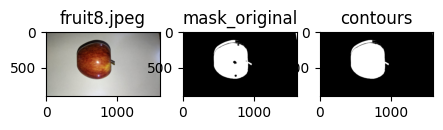

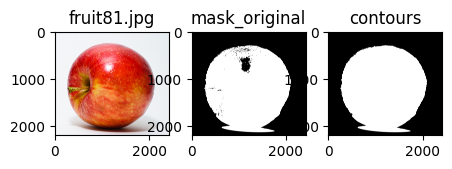

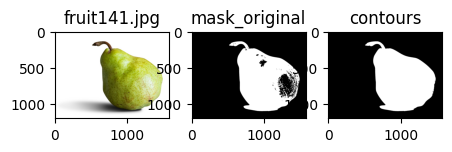

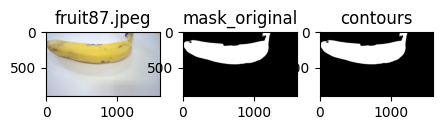

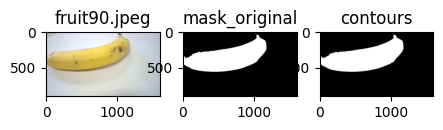

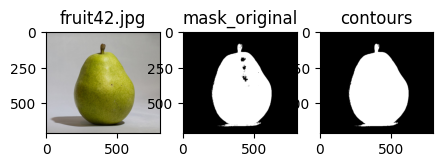

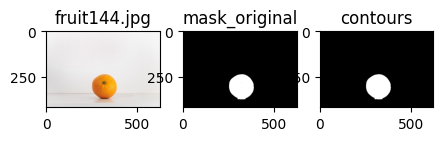

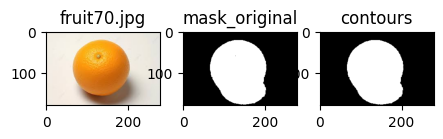

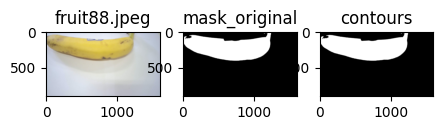

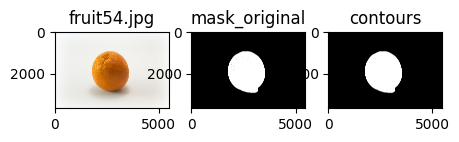

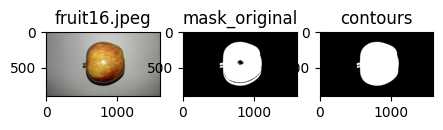

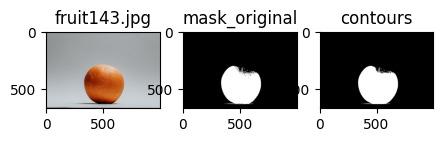

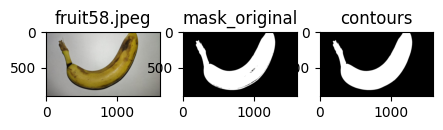

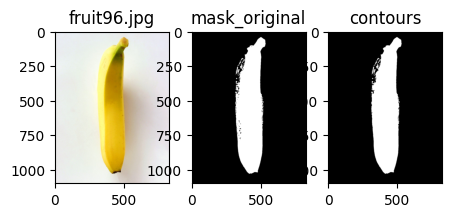

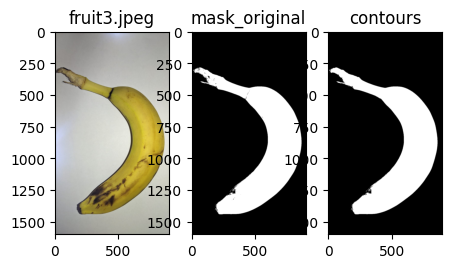

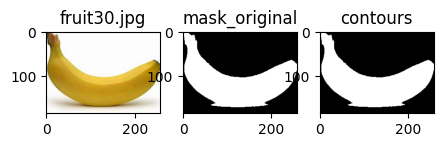

In [18]:
for k, file in enumerate(complicated):
    # BGR image
    image = cv2.imread(file)

    height, width, _ = image.shape
 
    # Pixel data vector
    data_vector = np.zeros((height * width, 5))  # 3 for RGB, 3 for HSV, 3 for LAB, 1 for gray scale

    # Obtener matrices de color
    rgb_matrix = image.reshape((-1, 3))
    hsv_matrix = cv2.cvtColor(image, cv2.COLOR_BGR2HSV).reshape((-1, 3))
    lab_matrix = cv2.cvtColor(image, cv2.COLOR_BGR2LAB).reshape((-1, 3))

    # Asignar a la matriz de datos
    data_vector[:, 0] = rgb_matrix[:, 0]
    data_vector[:, 1] = hsv_matrix[:, 1]
    data_vector[:, 2] = lab_matrix[:, 2]

    kmeans = KMeans(n_clusters = 2, n_init = 10)  # 2 Clusters. Background and fruit
    kmeans.fit(data_vector)

    # Get clusters labels
    labels = kmeans.labels_

    # kmeans_mask
    kmeans_mask = labels.reshape(height, width)
    kmeans_mask = kmeans_mask.astype(np.uint8) * 255

    # Determinación del tipo de fondo de la máscara

    # La estrategia es análizar una matriz de pixeles en todas las esquinas
    # de un orden cuadrado y también en los bordes de la mágen y contar la 
    # proporción del total que es blanca y la proporción que es negra.

    cluster_size = 3
    cluster = np.ones((cluster_size, cluster_size), np.uint8)

    # Corners
    corner1 = np.bitwise_and(cluster, kmeans_mask[:cluster_size,  :cluster_size])
    corner2 = np.bitwise_and(cluster, kmeans_mask[:cluster_size:, -cluster_size:])
    corner3 = np.bitwise_and(cluster, kmeans_mask[-cluster_size:, :cluster_size])
    corner4 = np.bitwise_and(cluster, kmeans_mask[-cluster_size:, -cluster_size:])
    corners = [corner1, corner2, corner3, corner4]

    # Sides
    limitw1 = (width - cluster_size)//2
    limitw2 = (width + cluster_size)//2
    limith1 = (height - cluster_size)//2
    limith2 = (height + cluster_size)//2
    
    side1   = np.bitwise_and(cluster, kmeans_mask[:cluster_size, limitw1:limitw2])
    side2   = np.bitwise_and(cluster, kmeans_mask[limith1:limith2, :cluster_size])
    side3   = np.bitwise_and(cluster, kmeans_mask[limith1:limith2, -cluster_size:])
    side4   = np.bitwise_and(cluster, kmeans_mask[-cluster_size:, limitw1:limitw2])
    sides   = [side1, side2, side3, side4] 

    # Determining the type of background
    edges            = corners + sides
    light_background = sum(np.count_nonzero(edge) for edge in edges) > 0.9*8*(cluster_size**2)
    if light_background:
        kmeans_mask = np.bitwise_not(kmeans_mask)

    '''# kmeans
    sobel_x = cv2.Sobel(kmeans_mask, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(kmeans_mask, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, kmeansWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Encontrar contornos
    kmeans_cnt, _ = cv2.findContours(kmeansWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)'''

    # Encontrar contornos
    kmeans_cnt, _ = cv2.findContours(kmeans_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    tkmeans = np.zeros((height, width), dtype=np.uint8)

    # Dibujar
    cv2.drawContours(tkmeans, kmeans_cnt, -1, 255, thickness = cv2.FILLED)

    # plotting
    plt.figure(figsize =(5,5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(file))
    plt.subplot(1, 3, 2)
    plt.imshow(kmeans_mask, cmap='gray')
    plt.title('mask_original')
    plt.subplot(1, 3, 3)
    plt.imshow(tkmeans, cmap='gray')
    plt.title('contours')
    '''plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(image_out, cv2.COLOR_BGR2RGB))
    plt.title('stripped')'''
    '''plt.subplot(1, 5, 5)
    plt.imshow(smoothed, cmap='gray')
    plt.title('smoothed')'''
    plt.show()